#Define Bussiness Problem
memitigasi resiko tingginya turnover karyawan dengan menyeleksi berdasarkan beberapa faktor

#goals
mencari faktor-faktor yang berkorelasi dengan tingginya turnover rate karyawan

#analisa deskriptif
tidak ada missing value

#insight
Current Attrition Rate Perusahaan berada di kisaran 16.12%

semakin tinggi usia, semakin rendah attrition rate
tidak terlalu berpengaruh thd performa

attrition rate karyawan dengan status cerai paling rendah, dikisaran 10.09%
attrition rate karyawan dengan status menikah dikisaran 12.48%
attrition rate karyawan dengan status single paling tinggi dikisaran 25.5%
tidak terlalu berpengaruh thd performa

tempat tinggal karyawan cukup berpengaruh thd attrition rate, jarak rata-rata tempat tinggal:
8.91 utk yg tidak resign, 10.63 utk karyawan yg resign
tidak terlalu berpengaruh thd performa

tingkat pendidikan hanya sedikit pengaruhnya terhadap attrition rate:
2.92 utk yg tidak resign, 2.83 utk karyawan yg resign
tidak terlalu berpengaruh thd performa

#kesimpulan
Untuk menekan attrition rate:
Lebih baik memilih karyawan dengan latar belakang usia yg tidak terlalu muda, statusnya bukan single, bertempat tinggal dekat, dan yang lebih berpendidikan

In [441]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
olddata = pd.read_csv('employee.csv')

In [442]:
olddata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [443]:
print("Daftar kolom: ", olddata.columns)

Daftar kolom:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [444]:
data = olddata[['Age','Attrition','DistanceFromHome','Education','MaritalStatus','PerformanceRating']]

In [445]:
data

,Age,Attrition,DistanceFromHome,Education,MaritalStatus,PerformanceRating
0,41,Yes,1,2,Single,3
1,49,No,8,1,Married,4
2,37,Yes,2,2,Single,3
3,33,No,3,4,Married,3
4,27,No,2,1,Married,3
...,...,...,...,...,...,...
1465,36,No,23,2,Married,3
1466,39,No,6,1,Married,3
1467,27,No,4,3,Married,4
1468,49,No,2,3,Married,3


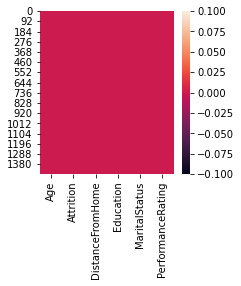

In [472]:
plt.figure(figsize=(3,3))# untuk size
sns.heatmap(data.isna()) # untuk plot heatmap NaN

#checking missing value

In [473]:
data.isna().sum()

Age                  0
Attrition            0
DistanceFromHome     0
Education            0
MaritalStatus        0
PerformanceRating    0
dtype: int64

In [474]:
att_total = data['Attrition'].value_counts()
att_total

No     1233
Yes     237
Name: Attrition, dtype: int64

In [475]:
#company total attrition rate
att_rate = att_total['Yes']/att_total.sum()*100

print(att_rate,'%')

16.122448979591837 %


In [476]:
att_by_age = data[['Attrition','Age','PerformanceRating']]
att_by_age

,Attrition,Age,PerformanceRating
0,Yes,41,3
1,No,49,4
2,Yes,37,3
3,No,33,3
4,No,27,3
...,...,...,...
1465,No,36,3
1466,No,39,3
1467,No,27,4
1468,No,49,3


In [477]:
att_total_age = att_by_age.groupby(['Attrition']).sum()
att_total_age

,Age,PerformanceRating
Attrition,,
No,46313,3888
Yes,7965,748


In [478]:
att_by_age_corr = att_total_age['Age']/att_total
att_by_age_corr

Attrition
No     37.561233
Yes    33.607595
dtype: float64

In [479]:
att_age_perf = att_by_age.groupby(['Age']).count()
att_total_perf = att_by_age.groupby(['Age']).sum()

att_perf_by_age = att_total_perf/att_age_perf
att_perf_by_age['PerformanceRating']

Age
18    3.000000
19    3.444444
20    3.000000
21    3.153846
22    3.250000
23    3.214286
24    3.115385
25    3.115385
26    3.256410
27    3.104167
28    3.125000
29    3.088235
30    3.216667
31    3.173913
32    3.163934
33    3.155172
34    3.155844
35    3.115385
36    3.188406
37    3.100000
38    3.137931
39    3.166667
40    3.175439
41    3.175000
42    3.130435
43    3.187500
44    3.121212
45    3.170732
46    3.212121
47    3.083333
48    3.157895
49    3.166667
50    3.066667
51    3.210526
52    3.111111
53    3.157895
54    3.111111
55    3.136364
56    3.142857
57    3.250000
58    3.285714
59    3.200000
60    3.200000
Name: PerformanceRating, dtype: float64

In [480]:
att_by_marital = data[['Attrition','MaritalStatus','PerformanceRating']]
att_by_marital

,Attrition,MaritalStatus,PerformanceRating
0,Yes,Single,3
1,No,Married,4
2,Yes,Single,3
3,No,Married,3
4,No,Married,3
...,...,...,...
1465,No,Married,3
1466,No,Married,3
1467,No,Married,4
1468,No,Married,3


In [481]:
att_total_marital = pd.crosstab(index=data['Attrition'], columns=data['MaritalStatus'])
att_total_marital

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


In [482]:
percent_att_marital_single= 120/(350+120)*100
percent_att_marital_single

25.53191489361702

In [483]:
percent_att_marital_married= 84/(589+84)*100
percent_att_marital_married

12.481426448736999

In [484]:
percent_att_marital_divorced= 33/(294+33)*100
percent_att_marital_divorced

10.091743119266056

In [497]:
att_marital_perf = att_by_marital.groupby(['MaritalStatus']).count()
att_total_perf= att_by_marital.groupby(['MaritalStatus']).sum()
att_marital_perf
# att_perf_by_marital = att_total_perf/att_age_perf
# att_perf_by_marital['PerformanceRating']

,Attrition,PerformanceRating
MaritalStatus,,
Divorced,327,327
Married,673,673
Single,470,470


In [498]:
att_total_perf= att_by_marital.groupby(['MaritalStatus']).sum()
att_total_perf['PerformanceRating']/att_marital_perf['PerformanceRating']

MaritalStatus
Divorced    3.146789
Married     3.157504
Single      3.153191
Name: PerformanceRating, dtype: float64

In [499]:
att_by_dist = data[['Attrition','DistanceFromHome','PerformanceRating']]
att_by_dist

,Attrition,DistanceFromHome,PerformanceRating
0,Yes,1,3
1,No,8,4
2,Yes,2,3
3,No,3,3
4,No,2,3
...,...,...,...
1465,No,23,3
1466,No,6,3
1467,No,4,4
1468,No,2,3


In [500]:
att_sum_dist = att_by_dist.groupby(['Attrition']).sum()
att_total_dist = att_by_dist.groupby(['Attrition']).count()
att_sum_dist/att_total_dist

,DistanceFromHome,PerformanceRating
Attrition,,
No,8.915653,3.153285
Yes,10.632911,3.156118


In [489]:
att_by_edu = data[['Attrition','Education','PerformanceRating']]
att_by_edu

,Attrition,Education,PerformanceRating
0,Yes,2,3
1,No,1,4
2,Yes,2,3
3,No,4,3
4,No,1,3
...,...,...,...
1465,No,2,3
1466,No,1,3
1467,No,3,4
1468,No,3,3


In [490]:
att_sum_edu = att_by_edu.groupby(['Attrition']).sum()
att_total_edu = att_by_edu.groupby(['Attrition']).count()
att_sum_edu/att_total_edu

,Education,PerformanceRating
Attrition,,
No,2.927007,3.153285
Yes,2.839662,3.156118


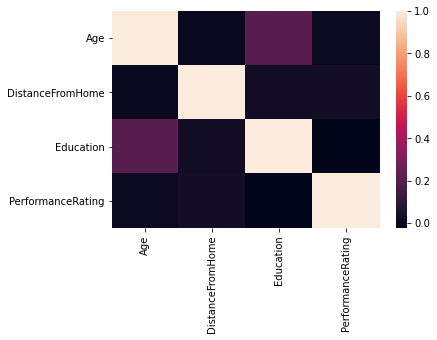

In [491]:
sns.heatmap(data.corr())

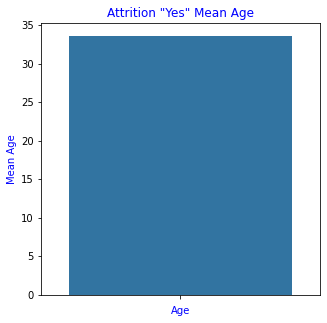

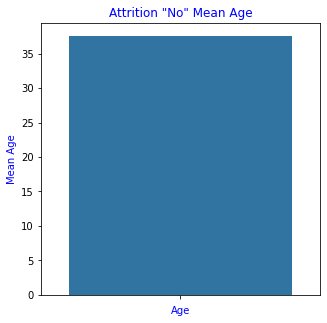

In [492]:
figgg = plt.subplots(figsize=(5,5))
axes1 = sns.barplot(y=att_by_age_corr['Yes'])
axes1.set_xlabel('Age',color='b')
axes1.set_ylabel('Mean Age',color='b')
axes1.set_title('Attrition "Yes" Mean Age',color='b')
plt.show()

figgg = plt.subplots(figsize=(5,5))
axes2 = sns.barplot(y=att_by_age_corr['No'])
axes2.set_xlabel('Age',color='b')
axes2.set_ylabel('Mean Age',color='b')
axes2.set_title('Attrition "No" Mean Age',color='b')
plt.show()

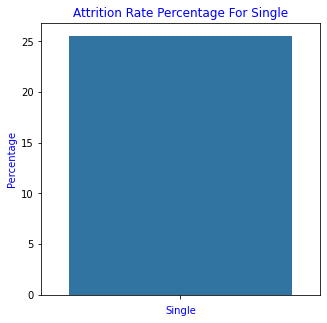

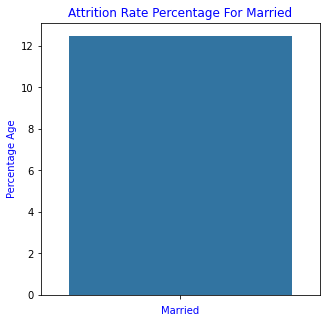

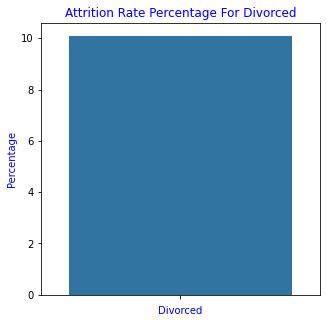

In [493]:
figgg = plt.subplots(figsize=(5,5))
axes1 = sns.barplot(y=percent_att_marital_single)
axes1.set_xlabel('Single',color='b')
axes1.set_ylabel('Percentage',color='b')
axes1.set_title('Attrition Rate Percentage For Single',color='b')
plt.show()


figgg = plt.subplots(figsize=(5,5))
axes2 = sns.barplot(y=percent_att_marital_married)
axes2.set_xlabel('Married',color='b')
axes2.set_ylabel('Percentage Age',color='b')
axes2.set_title('Attrition Rate Percentage For Married',color='b')
plt.show()

figgg = plt.subplots(figsize=(5,5))
axes3 = sns.barplot(y=percent_att_marital_divorced)
axes3.set_xlabel('Divorced',color='b')
axes3.set_ylabel('Percentage',color='b')
axes3.set_title('Attrition Rate Percentage For Divorced',color='b')
plt.show()


In [494]:
att_range_corr = att_sum_dist/att_total_dist
att_range_corr

att_edu_corr = att_sum_edu/att_total_edu
att_edu_corr

,Education,PerformanceRating
Attrition,,
No,2.927007,3.153285
Yes,2.839662,3.156118


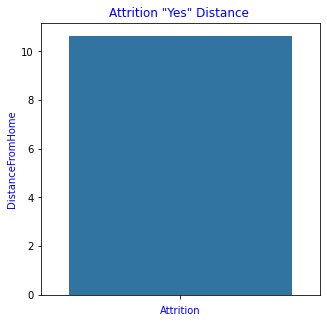

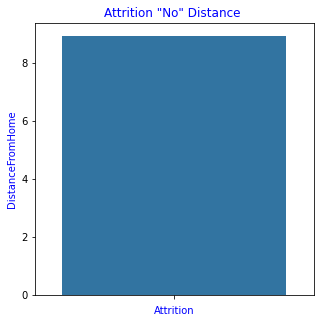

In [495]:
figgg = plt.subplots(figsize=(5,5))
axes = sns.barplot(y=att_range_corr['DistanceFromHome']['Yes'])
axes.set_xlabel('Attrition',color='b')
axes.set_ylabel('DistanceFromHome',color='b')
axes.set_title('Attrition "Yes" Distance ',color='b')
plt.show()


figgg = plt.subplots(figsize=(5,5))
axes = sns.barplot(y=att_range_corr['DistanceFromHome']['No'])
axes.set_xlabel('Attrition',color='b')
axes.set_ylabel('DistanceFromHome',color='b')
axes.set_title('Attrition "No" Distance ',color='b')
plt.show()


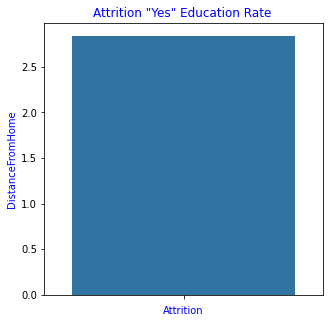

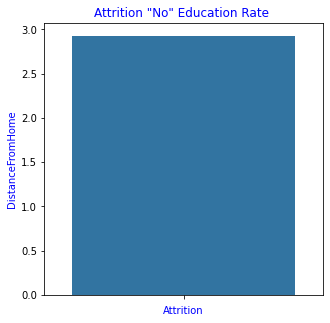

In [496]:
figgg = plt.subplots(figsize=(5,5))
axes = sns.barplot(y=att_edu_corr['Education']['Yes'])
axes.set_xlabel('Attrition',color='b')
axes.set_ylabel('DistanceFromHome',color='b')
axes.set_title('Attrition "Yes" Education Rate ',color='b')
plt.show()


figgg = plt.subplots(figsize=(5,5))
axes = sns.barplot(y=att_edu_corr['Education']['No'])
axes.set_xlabel('Attrition',color='b')
axes.set_ylabel('DistanceFromHome',color='b')
axes.set_title('Attrition "No" Education Rate ',color='b')
plt.show()
